In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pyBedGraph import BedGraph
from pybedtools import BedTool
import scipy.stats

In [118]:
def read_cf(directory, file_name):
    with open(directory + file_name) as f:
        next(f)
        countlist = []
        for line in f:
            tmp = line.strip().split("\t")
            countlist.append([tmp[1], int(tmp[5]), int(tmp[7])]) # region, M2L, M2R
    return countlist

In [119]:
def plot_boxplot(dataset, dlabel, clr, tit, ylab, fig_name):
    fig = plt.figure(figsize = (8,6))
    medianprops = dict(linewidth = 3, color=clr)
    i=0
    boxprops = dict(linewidth = 1.5)
    toplot = [np.asarray([]) for i in range(len(dataset))]
    for d in dataset:
        #medianprops = dict(linewidth = 3, color=colcode[i])
        datax = toplot
        datax[i] = np.asarray(dataset[i])
        plt.boxplot(datax, widths = 0.6, medianprops = medianprops, boxprops = boxprops)
        i +=1
    plt.xticks([i for i in range(1, len(dataset)+1)], dlabel, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)
    #plt.ylim(bottom=2.5)
    plt.title(tit, fontsize = 18)
    plt.savefig(fig_name+'.pdf', dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

In [120]:
def write_result(directory, out_list, out_name):
    with open(directory+out_name, 'a') as file1:
        for i in range(len(out_list)):
            file1.write('\t'.join(map(str, out_list[i])) + '\n')
    file1.close()

In [164]:
directory='/Users/kimm/Desktop/GM12878_files/'
#loadff='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-loading_TSS-forward_genebodylen_sem.stats.txt'
#loadrf='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-loading_TSS-reverse_genebodylen_sem.stats.txt'
#loadnonf='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-loading_non-TSS_genebodylen_sem.stats.txt'
#anchfff='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-forward_TSS-forward_sem.stats.txt'
#anchfrf='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-forward_TSS-reverse_sem.stats.txt'
#anchrff='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-reverse_TSS-forward_sem.stats.txt'
#anchrrf='GM12878-RNAPII-pooledv2_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-reverse_TSS-reverse_sem.stats.txt'
loadff='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-loading_TSS-forward_genebodylen_sem.stats.txt'
loadrf='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-loading_TSS-reverse_genebodylen_sem.stats.txt'
loadnonf='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-loading_non-TSS_genebodylen_sem.stats.txt'
anchfff='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-forward_TSS-forward_sem.stats.txt'
anchfrf='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-forward_TSS-reverse_sem.stats.txt'
anchrff='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-reverse_TSS-forward_sem.stats.txt'
anchrrf='GM12878-cohesin-pooled_comp_FDR_0.2_PASS.RNAPII-peaks-anchor_mt-reverse_TSS-reverse_sem.stats.txt'

In [165]:
loadf = read_cf(directory, loadff)
loadr = read_cf(directory, loadrf)
loadnon = read_cf(directory, loadnonf)
anchff = read_cf(directory, anchfff)
anchfr = read_cf(directory, anchfrf)
anchrf = read_cf(directory, anchrff)
anchrr = read_cf(directory, anchrrf)

In [166]:
loadtss_left = [x[1]/max(1,x[1]+x[2]) for x in loadf if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
loadtss_left.extend([x[2]/max(1,x[1]+x[2]) for x in loadr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])
loadtss_right = [x[2]/max(1,x[1]+x[2]) for x in loadf if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
loadtss_right.extend([x[1]/max(1,x[1]+x[2]) for x in loadr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])
loadnon_left = [x[1]/max(1,x[1]+x[2]) for x in loadnon if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
loadnon_right = [x[2]/max(1,x[1]+x[2]) for x in loadnon if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]

In [167]:
np.median(loadtss_left)

0.4536082474226804

In [168]:
np.median(loadtss_right)

0.5463917525773195

In [169]:
stat1 = scipy.stats.mannwhitneyu(loadtss_left, loadtss_right)
stat2 = scipy.stats.mannwhitneyu(loadnon_left, loadnon_right)

In [170]:
title = "Cohesin Loading \n  TSS Left: median = " + str(round(np.median(loadtss_left), 2)) + "; n = " + str(len(loadtss_left)) + "\n" + "TSS Right: median = " + str(round(np.median(loadtss_right), 2)) + "; n = " + str(len(loadtss_right)) + "\n" + "non-TSS Left: median = " + str(round(np.median(loadnon_left), 2)) + "; n = " + str(len(loadnon_left)) + "\n" + "non-TSS Right: median = " + str(round(np.median(loadnon_right), 2)) + "; n = " + str(len(loadnon_right))   

In [171]:
title = title + '\n stat1: '+str(stat1[0]) + '; pval1: ' + str(stat1[1])
title = title + '\n stat2: '+str(stat2[0]) + '; pval2: ' + str(stat2[1])

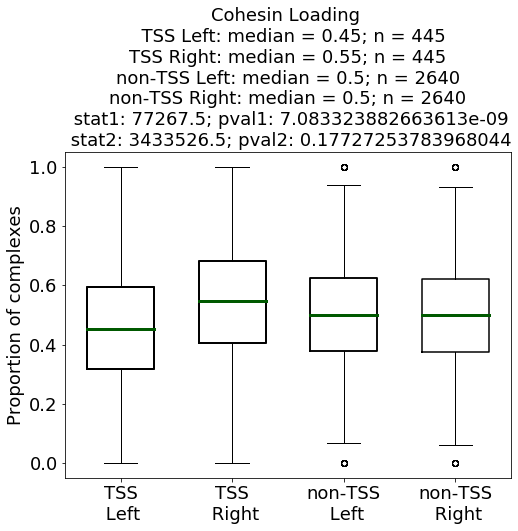

In [172]:
plot_boxplot([loadtss_left, loadtss_right, loadnon_left, loadnon_right], ['TSS\n Left', 'TSS\n Right', 'non-TSS\n Left', 'non-TSS\n Right'], '#005900', title, 'Proportion of complexes', 'Fig4_cohesin_loading_tss-nontss_proportion_boxplot')

In [173]:
anchcon_left = [x[1]/max(1,x[1]+x[2]) for x in anchff if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
anchcon_left.extend([x[2]/max(1,x[1]+x[2]) for x in anchrr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])
anchcon_right = [x[2]/max(1,x[1]+x[2]) for x in anchff if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
anchcon_right.extend([x[1]/max(1,x[1]+x[2]) for x in anchrr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])

anchdis_left = [x[1]/max(1,x[1]+x[2]) for x in anchfr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
anchdis_left.extend([x[2]/max(1,x[1]+x[2]) for x in anchrf if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])
anchdis_right = [x[2]/max(1,x[1]+x[2]) for x in anchfr if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000]
anchdis_right.extend([x[1]/max(1,x[1]+x[2]) for x in anchrf if int(x[0].split(":")[1].split("-")[1])-int(x[0].split(":")[1].split("-")[0])>100000])

In [174]:
stat1 = scipy.stats.mannwhitneyu(anchcon_left, anchcon_right)
stat2 = scipy.stats.mannwhitneyu(anchdis_left, anchdis_right)

In [175]:
title = "Cohesin Anchor \n  Concordant Left: median = " + str(round(np.median(anchcon_left), 2)) + "; n = " + str(len(anchcon_left)) + "\n" + "Concordant Right: median = " + str(round(np.median(anchcon_right), 2)) + "; n = " + str(len(anchcon_right)) + "\n" + "Discordant Left: median = " + str(round(np.median(anchdis_left), 2)) + "; n = " + str(len(anchdis_left)) + "\n" + "Discordant Right: median = " + str(round(np.median(anchdis_right), 2)) + "; n = " + str(len(anchdis_right))   

In [176]:
title = title + '\n stat1: '+str(stat1[0]) + '; pval1: ' + str(stat1[1])
title = title + '\n stat2: '+str(stat2[0]) + '; pval2: ' + str(stat2[1])

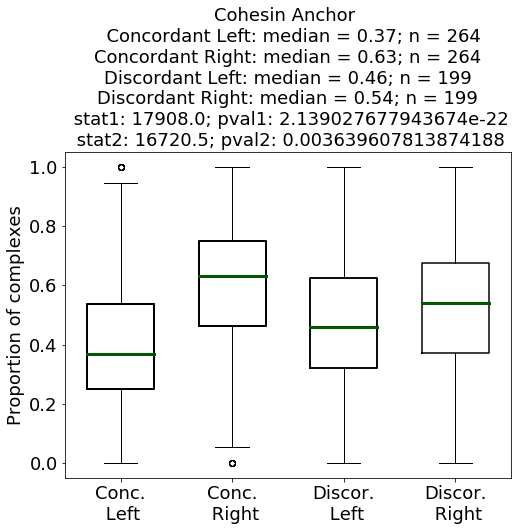

In [177]:
plot_boxplot([anchcon_left, anchcon_right, anchdis_left, anchdis_right], ['Conc.\n Left', 'Conc.\n Right', 'Discor.\n Left', 'Discor.\n Right'], '#005900', title, 'Proportion of complexes', 'Fig4_cohesin_anchor_tssconcord-discord_proportion_boxplot')